<h1>Network of Reddit Users with Negative Sentiments</h1>

Objective: 
- To find out which author on Reddit is the most negative based its interaction with other authors (determined by the edge weight/frequency) in the coronavirus anti lockdown subreddit and possibly showcase some comments which have been posted by that author of interest

Findings:
- Most negative author: Johari82

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
reddit_sentiments = pd.read_csv('./Reddit_Sentiments/covid19_lockdown_sentiments1.csv')

In [3]:
reddit_sentiments

,Unnamed: 0,Unnamed: 0.1,id,author,url,commenter,comment,top_lvl,sentiment_polarity
0,0,0,11f10ux,BurnerAcc2020,https://academic.oup.com/cid/advance-article/d...,AutoModerator,**Please read before commenting.**\n\nKeep in ...,1,positive
1,1,0,11g1u29,BurnerAcc2020,https://www.sciencedirect.com/science/article/...,AutoModerator,**Please read before commenting.**\n\nKeep in ...,1,positive
2,2,0,10v3vdl,BurnerAcc2020,https://www.nature.com/articles/s41598-023-286...,AutoModerator,**Please read before commenting.**\n\nKeep in ...,1,positive
3,3,0,zu8efy,BurnerAcc2020,https://bmcprimcare.biomedcentral.com/articles...,AutoModerator,**Please read before commenting.**\n\nKeep in ...,1,positive
4,4,0,yhgvab,BurnerAcc2020,https://dmsjournal.biomedcentral.com/articles/...,AutoModerator,**Please read before commenting.**\n\nKeep in ...,1,positive
...,...,...,...,...,...,...,...,...,...
159744,159744,0,w1a3kj,BurnerAcc2020,https://www.sciencedirect.com/science/article/...,NaN,If Covid was seasonal you wouldn't see massive...,1,neutral
159745,159745,0,w1a3kj,BurnerAcc2020,https://www.sciencedirect.com/science/article/...,BurnerAcc2020,Have you actually read this peer-reviewed pape...,0,neutral
159746,159746,0,v7cb54,zeaqqk,https://www.medrxiv.org/content/10.1101/2022.0...,AutoModerator,**Reminder:** This post contains a **preprint*...,1,neutral
159747,159747,0,v7cb54,zeaqqk,https://www.medrxiv.org/content/10.1101/2022.0...,PEKKAmi,We know strict lockdowns work to reduce transm...,1,neutral


In [4]:
# Create new DataFrame for forming a network graph

user_networks = reddit_sentiments.filter(['author','commenter','comment'], axis=1)
user_networks['type'] = ['Undirected'] * user_networks.shape[0]
user_networks['weight'] = [1] * user_networks.shape[0]
user_networks

,author,commenter,comment,type,weight
0,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
1,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
2,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
3,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
4,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
...,...,...,...,...,...
159744,BurnerAcc2020,NaN,If Covid was seasonal you wouldn't see massive...,Undirected,1
159745,BurnerAcc2020,BurnerAcc2020,Have you actually read this peer-reviewed pape...,Undirected,1
159746,zeaqqk,AutoModerator,**Reminder:** This post contains a **preprint*...,Undirected,1
159747,zeaqqk,PEKKAmi,We know strict lockdowns work to reduce transm...,Undirected,1


In [5]:
# Check for correctness

author = user_networks[user_networks['author'] == 'BurnerAcc2020']
author

,author,commenter,comment,type,weight
0,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
1,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
2,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
3,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
4,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
...,...,...,...,...,...
159732,BurnerAcc2020,Vasastan1,>There is much to lament in the politicization...,Undirected,1
159733,BurnerAcc2020,NaN,[removed],Undirected,1
159743,BurnerAcc2020,AutoModerator,**Please read before commenting.**\n\nKeep in ...,Undirected,1
159744,BurnerAcc2020,NaN,If Covid was seasonal you wouldn't see massive...,Undirected,1


In [6]:
# Preview edge weight

edges = user_networks.groupby(['author','commenter']).agg({'weight':'sum'}).reset_index()
edges

,author,commenter,weight
0,Andynr,8eep800p,418
1,Andynr,Andynr,428
2,Andynr,AutoModerator,1255
3,Andynr,Big_Stall_Gaps,419
4,Andynr,Biggles79,415
...,...,...,...
417,p44v9n,verus_es_tu,95
418,p44v9n,xlm13x,92
419,zeaqqk,AutoModerator,405
420,zeaqqk,PEKKAmi,405


In [7]:
# Sort DataFrame based on descending edge weight

edges.sort_values('weight', ascending=False).head()

,author,commenter,weight
23,BurnerAcc2020,AutoModerator,5133
63,Johari82,JenniferColeRhuk,4272
197,Peeecee7896,AutoModerator,1491
145,Johari82,jphamlore,1360
366,lonnib,lonnib,1308


In [8]:
# Create a network graph

network = nx.from_pandas_edgelist(edges, 
                            source='author',
                            target='commenter',
                            edge_attr='weight' )

In [9]:
# Get network graph nodes (author) and edges (interaction) info

print(nx.info(network))

Graph with 387 nodes and 422 edges


<ipython-input-9-06ea12accad0>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


In [10]:
# Get network graph degree per node

weighted_degrees = dict(nx.degree(network, weight='weight'))
weighted_degrees['AutoModerator']
avg_degree = sum(weighted_degrees.values()) / len(weighted_degrees.values())
avg_degree

606.842377260982

In [11]:
subGraph = network.subgraph([n for n in weighted_degrees if weighted_degrees[n] > 606])

In [12]:
# Focus on sub network with a considerable high degree centrality

print(nx.info(subGraph))

Graph with 31 nodes and 52 edges


<ipython-input-12-f52f3a138b15>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subGraph))


In [13]:
# Create subgraph's network 

pos = nx.spring_layout(subGraph, weight='weight', iterations=20, k = 4)

<ipython-input-14-108c8971fec4>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


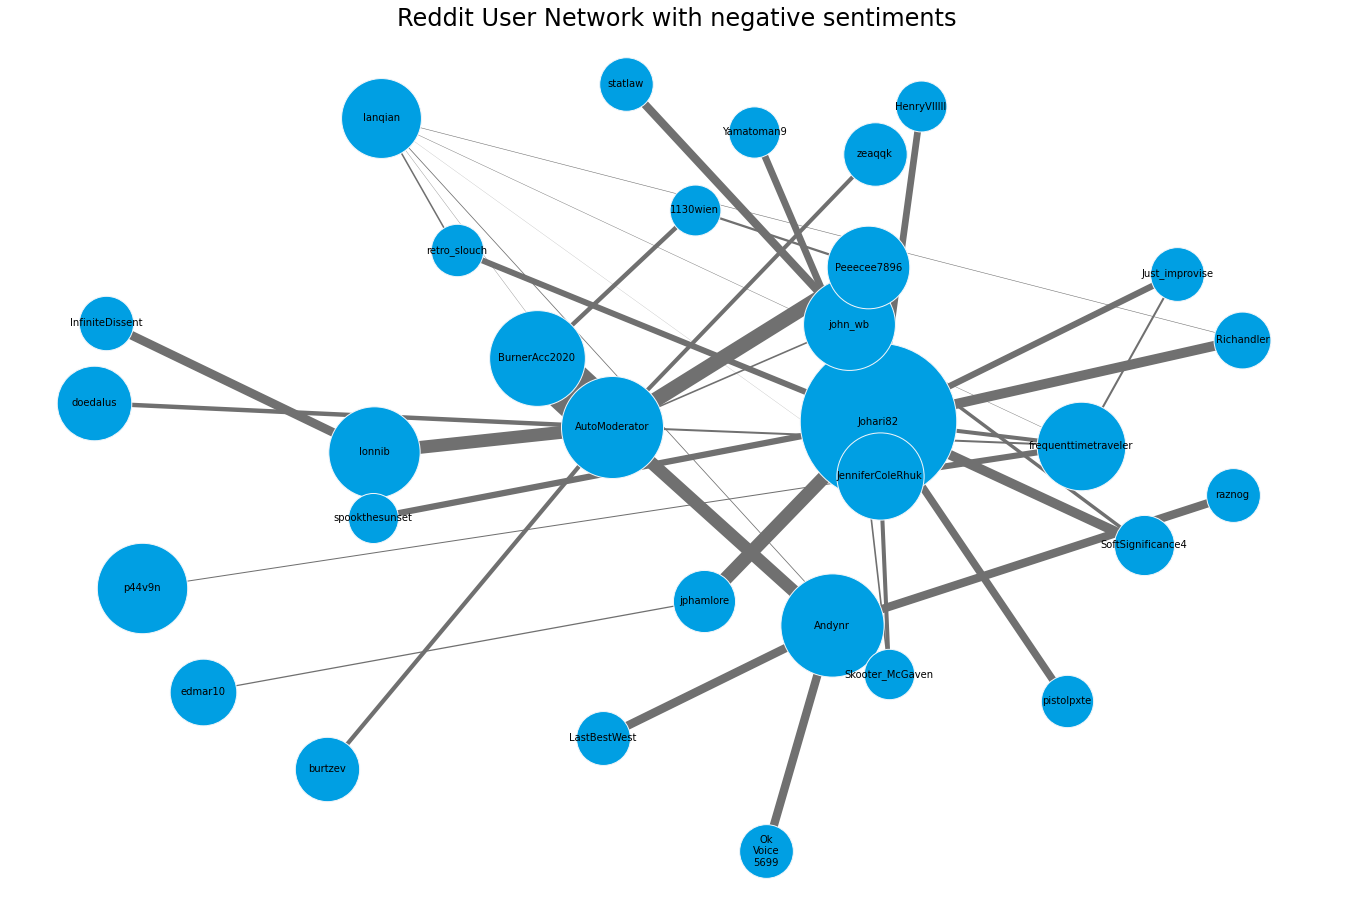

In [14]:
# Plot subgraph's network

fig, ax = plt.subplots()
figsize = fig.get_size_inches()
plt.axis('off')
plt.title('Reddit User Network with negative sentiments', fontsize = 24)


for node in subGraph.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subGraph, pos, nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subGraph, pos, {n:n.replace('-','\n') for n in subGraph.nodes() if weighted_degrees[n]>100},font_size=10);

for e in subGraph.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subGraph, pos,[e], width=e[2]['weight']/100, edge_color='#707070')
        
fig.set_size_inches(figsize * 4)
fig.show()

In [15]:
# Most negative user and its comments

author = reddit_sentiments[(reddit_sentiments['author'] == 'Johari82') & (reddit_sentiments['sentiment_polarity'] == 'negative')]
author

,Unnamed: 0,Unnamed: 0.1,id,author,url,commenter,comment,top_lvl,sentiment_polarity
1812,1812,0,g1hpwu,Johari82,https://www.sciencemag.org/news/2020/04/ending...,NaN,This sounds horrible and I hate myself a littl...,0,negative
1903,1903,0,g1hpwu,Johari82,https://www.sciencemag.org/news/2020/04/ending...,NaN,This sounds horrible and I hate myself a littl...,0,negative
1904,1904,0,g1hpwu,Johari82,https://www.sciencemag.org/news/2020/04/ending...,lcbk,My husband and I are not yet confirmed to have...,0,negative
1995,1995,0,g1hpwu,Johari82,https://www.sciencemag.org/news/2020/04/ending...,NaN,This sounds horrible and I hate myself a littl...,0,negative
1996,1996,0,g1hpwu,Johari82,https://www.sciencemag.org/news/2020/04/ending...,lcbk,My husband and I are not yet confirmed to have...,0,negative
...,...,...,...,...,...,...,...,...,...
159259,159259,0,g1hpwu,Johari82,https://www.sciencemag.org/news/2020/04/ending...,starrpamph,"Some of you may die, but that's a risk the gov...",1,negative
159267,159267,0,g1hpwu,Johari82,https://www.sciencemag.org/news/2020/04/ending...,ABrizzie,Cause the other one is shit,0,negative
159278,159278,0,g1hpwu,Johari82,https://www.sciencemag.org/news/2020/04/ending...,G1BS0N_1,As much as we are all bored. No work for some ...,1,negative
159283,159283,0,g1hpwu,Johari82,https://www.sciencemag.org/news/2020/04/ending...,NaN,The poor will be the most affected by this.,0,negative
